In [402]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

# Gathering data

In [403]:
df = pd.read_csv('titanic_data.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Clean data

In [404]:
df.rename(columns={'Pclass':'Ticket_class',\
                   'Parch':'ParCh','Embarked':'Departure',\
                   'Ticket':'Ticket_No'},inplace=True)

In [405]:
df.head(3)

,PassengerId,Survived,Ticket_class,Name,Sex,Age,SibSp,ParCh,Ticket_No,Fare,Cabin,Departure
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Analysis data

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Ticket_class  891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   ParCh         891 non-null    int64  
 8   Ticket_No     891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Departure     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [407]:
def config_fig(axes_object, title, x_label, y_label, fig_name):
    axes_object.set_title(title, size=15, pad=15)
    axes_object.set_xlabel(x_label, size=15, labelpad=15)
    axes_object.set_ylabel(y_label, size=15, labelpad=15);
    axes_object.get_figure().savefig(fig_name);

# Visualization

#### How old was who were survived Vs. total aboard the Titanic ?

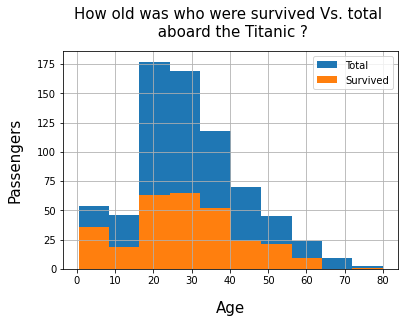

In [426]:
df1 = df['Age']
df2 = df[df['Survived'] == 1]['Age']
needed_rows = df1.shape[0]-df2.shape[0]
s3 = np.pad(df2.values,(0,needed_rows),'constant',constant_values=np.nan)
my_df = pd.DataFrame({'Total': df1.values, 'Survived':s3 })
ax = my_df.plot.hist(grid=True)
config_fig(ax, 'How old was who were survived Vs. total \n aboard the Titanic ?', \
          'Age', 'Passengers', 'figures/survived_ages.png')

#### How old was who were not survived Vs. total aboard the Titanic ?

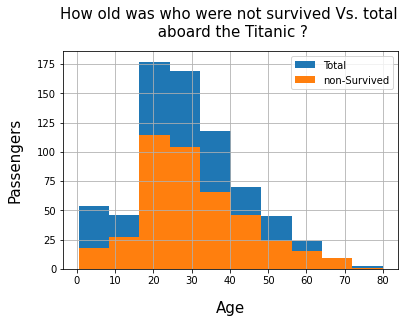

In [430]:
df1 = df['Age']
df2 = df[df['Survived'] == 0]['Age']
needed_rows = df1.shape[0]-df2.shape[0]
s3 = np.pad(df2.values,(0,needed_rows),'constant',constant_values=np.nan)
my_df = pd.DataFrame({'Total': df1.values, 'non-Survived':s3 })
ax = my_df.plot.hist(grid=True)
config_fig(ax, 'How old was who were not survived Vs. total \n aboard the Titanic ?', \
          'Age', 'Passengers', 'figures/died_ages.png')

#### How many was who had siblings or spouses aboard the Titanic ?

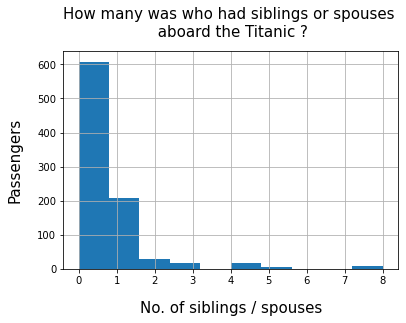

In [446]:
ax = df['SibSp'].plot.hist(grid=True);
config_fig(ax, 'How many was who had siblings or spouses \n aboard the Titanic ?', \
          "No. of siblings / spouses", 'Passengers', 'figures/sibSp.png')

#### How many was who had  parents / children aboard the Titanic ?

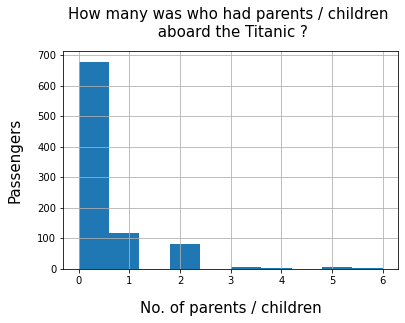

In [452]:
ax = df['ParCh'].plot.hist(grid=True);
config_fig(ax, 'How many was who had parents / children \n aboard the Titanic ?', \
          "No. of parents / children", "Passengers", 'figures/parCh.png')

#### What is the total number of each gender (Survived / not-Survived) aboard the Titanic ?

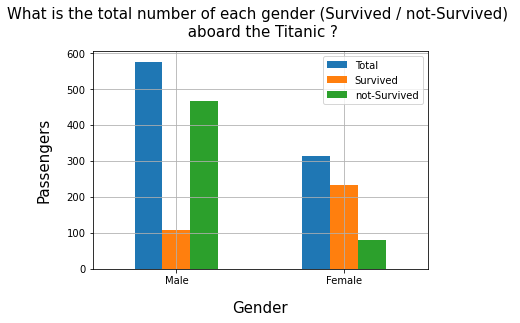

In [454]:
t_male = df[df['Sex'] == 'male']['Sex'].count() 
t_female = df[df['Sex'] == 'female']['Sex'].count() 
s_male = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]\
['Sex'].count()
s_female = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]\
['Sex'].count()
d_male = df[(df['Sex'] == 'male') & (df['Survived'] == 0)]\
['Sex'].count()
d_female = df[(df['Sex'] == 'female') & (df['Survived'] == 0)]\
['Sex'].count()
data = np.array([[t_male, s_male, d_male],[t_female, s_female, d_female]])
# print(data)
sex_df = pd.DataFrame(data = data,columns=['Total','Survived','not-Survived']\
                      ,index=['Male','Female'])
# sex_df
title = 'What is the total number of each gender (Survived / not-Survived) \n aboard the Titanic ?'
ax = sex_df.plot(kind='bar',rot=0,  grid=True)
config_fig(ax, title,"Gender", "Passengers", 'figures/total_gender.png')

#### What was the departure port of each who were survived and not-survived aboard the Titanic?

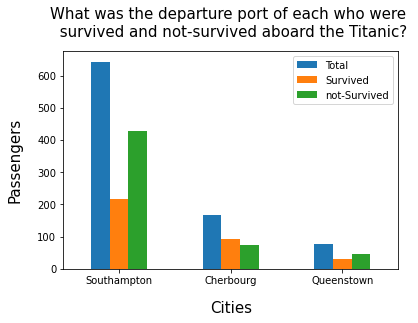

In [456]:
departure = dict()

departure['Southampton'] = [df[df['Departure'] == 'S']\
['PassengerId'].count() ,\
                            df[(df['Survived'] == 1) & (df['Departure'] == 'S')]\
['PassengerId'].count(), \
                           df[(df['Survived'] == 0) & (df['Departure'] == 'S')]\
['PassengerId'].count()]
# ######################################
departure['Cherbourg'] = [df[df['Departure'] == 'C']\
['PassengerId'].count(), \
                          df[(df['Survived'] == 1) & (df['Departure'] == 'C')]\
['PassengerId'].count(), \
                        df[(df['Survived'] == 0) & (df['Departure'] == 'C')]\
['PassengerId'].count() ]
# ######################################
departure['Queenstown'] = [df[df['Departure'] == 'Q']\
['PassengerId'].count(), \
                           df[(df['Survived'] == 1) & (df['Departure'] == 'Q')]\
['PassengerId'].count(), \
                          df[(df['Survived'] == 0) & (df['Departure'] == 'Q')]\
['PassengerId'].count()]
# print(departure)
data = departure.values()
index = departure.keys()
ax = pd.DataFrame(data=data, index=index,\
                  columns=['Total', 'Survived', 'not-Survived'])\
.plot(kind='bar',rot=0)

config_fig(ax,'What was the departure port \
of each who were \n survived and not-survived aboard the Titanic?',"Cities",\
           "Passengers", 'figures/depart.png')

#### What was the ticket class of each who were survived and not-survived aboard the Titanic ?


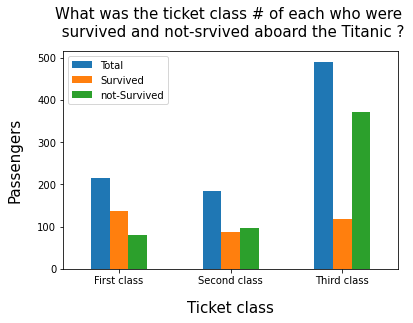

In [458]:
ticket_class = dict()
ticket_class['First class'] = [df[df['Ticket_class'] == 1]['PassengerId'].count() \
                               ,df[(df['Survived'] == 1) & (df['Ticket_class'] == 1)]\
['PassengerId'].count() ,df[(df['Survived'] == 0) & (df['Ticket_class'] == 1)]\
['PassengerId'].count()]

ticket_class['Second class'] = [df[df['Ticket_class'] == 2]['PassengerId'].count() \
                                ,df[(df['Survived'] == 1) & (df['Ticket_class'] == 2)]\
['PassengerId'].count(), df[(df['Survived'] == 0) & (df['Ticket_class'] == 2)]\
                                ['PassengerId'].count()]

ticket_class['Third class'] = [df[df['Ticket_class'] == 3]['PassengerId'].count() ,\
                               df[(df['Survived'] == 1) & (df['Ticket_class'] == 3)]\
['PassengerId'].count(), df[(df['Survived'] == 0) & (df['Ticket_class'] == 3)]\
['PassengerId'].count()]

# print(ticket_class)
data = ticket_class.values()
index = ticket_class.keys()
ax = pd.DataFrame(data=data, index=index, columns=['Total', 'Survived','not-Survived']).plot(kind='bar',rot=0)

config_fig(ax,'What was the ticket class \
# of each who were \n survived and not-srvived aboard the Titanic ?',"Ticket class",\
           "Passengers", 'figures/ticket.png')